In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
try:
    raw_df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
except:
    raw_df = pd.read_csv("./telco_churn_data.csv")

In [3]:
raw_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
Demographic info about customers – gender, age range, and if they have partners and dependents.
The are no missing values in data set.

In [4]:
df.shape

NameError: name 'df' is not defined

In [5]:
raw_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

In [7]:
df = raw_df.drop(['customerID'], axis=1)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)

# there are some sting value without anything like this " "

In [11]:
a = 'amal'
b =""

print(len(b.split()))
print(len(a.split()))

0
1


In [12]:
step_1 = [len(i.split()) for i in df['TotalCharges']]
# step_1

step_2 = [i for i in range(len(step_1)) if(step_1[i] != 1)]

print(f"so there are {len(step_2)} values without a digit")

so there are 11 values without a digit


In [13]:
df = df.drop(step_2, axis=0).reset_index(drop=True)

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

## dealing wth duplicate values

In [15]:
print("the sum of duplicate values are ", df.duplicated().sum())

the sum of duplicate values are  22


lets drop it too

In [16]:
df.drop_duplicates(inplace=True)

# df.duplicated().sum()

### create numerical and categorical list

In [17]:
numerical_col = []
categorical_col = []


for i in df.columns:
    if(len(df[i].unique())>6):
        numerical_col.append(i)
    else:
        categorical_col.append(i)
        
categorical_col = categorical_col[:-1]  # excluding curn

In [18]:
print("numerical features : ", numerical_col)
print("\n")
print("categorical features : ", categorical_col)

numerical features :  ['tenure', 'MonthlyCharges', 'TotalCharges']


categorical features :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [19]:
x = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42)

## Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

Standard_Scaler = StandardScaler()

Standard_Scaler.fit_transform(x_train[numerical_col])
Standard_Scaler.transform(x_test[numerical_col])

array([[ 1.58050429,  1.15480618,  2.1685052 ],
       [-0.82827979, -0.50586174, -0.76249426],
       [-1.15489459,  0.34448026, -0.88571813],
       ...,
       [-0.7466261 ,  0.38116168, -0.5124873 ],
       [ 1.58050429,  0.76464926,  1.80776476],
       [ 0.02908403,  0.4711979 ,  0.11262958]])

## one_hotencoding

In [22]:
print(categorical_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


ColumnTransformer is beneficial when you have a dataset with multiple columns, and you want to apply different preprocessing steps to different subsets of columns.
In this example, there are various categorical columns like 'gender', 'SeniorCitizen', 'Partner', etc. Instead of applying the encoding process separately to each column, 
ColumnTransformer allows you to specify a list of transformers for each subset of columns.

In [43]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# import pandas as pd

# # Assuming x_train is your input DataFrame

# # Extracting categorical columns from x_train
categoric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                      'PhoneService', 'MultipleLines', 'InternetService', 
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 
                      'Contract', 'PaperlessBilling', 'PaymentMethod']

# Creating a ColumnTransformer with OneHotEncoder
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categoric_columns))

# # Transforming the data
# transformed = transformer.fit_transform(x_train)

# # Extracting feature names from OneHotEncoder
# feature_names = transformer.named_transformers_['onehotencoder'].get_feature_names_out(categoric_columns)

# # Creating a DataFrame with transformed features and appropriate column names
# transformed_df = pd.DataFrame(transformed, columns=feature_names)

# # Restoring the index
# transformed_df.index = x_train.index

# # Joining the transformed features with the original DataFrame
# x_train = pd.concat([x_train, transformed_df], axis=1)

# # Dropping old categorical columns
# x_train.drop(categoric_columns, axis=1, inplace=True)

# # Checking the result
# x_train.head()


In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

categoric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                      'PhoneService', 'MultipleLines', 'InternetService', 
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 
                      'Contract', 'PaperlessBilling', 'PaymentMethod']

categoric_columns_1 = ['gender','SeniorCitizen','Partner','Dependents',
                    'PhoneService','MultipleLines','InternetService',
                    'OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod']                         
        

In [25]:
transformer_1 = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoric_columns_1))

In [26]:
transformer_1

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [27]:
transformed_1 = transformer_1.fit_transform(x_train)

In [28]:
feature_names_1 = transformer_1.named_transformers_['onehotencoder'].get_feature_names_out(categoric_columns_1)

In [29]:
transformed_df_1 = pd.DataFrame(transformed_1, columns=feature_names_1)

In [30]:
transformed_df_1

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5604,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5605,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5606,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
transformed_df_1.index = x_train.index

In [32]:
x_train = pd.concat([x_train, transformed_df_1], axis=1)

In [33]:
x_train.shape

(5608, 62)

In [34]:
x_train.drop(categoric_columns_1, axis=1, inplace=True)

In [35]:
x_train.shape

(5608, 46)

In [36]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1324,23,54.25,1221.55,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5707,2,55.30,108.65,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1901,40,36.00,1382.90,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6677,2,79.20,172.85,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1875,2,86.00,165.45,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# x_test encoding

In [44]:
transformed_1 = transformer_1.transform(x_test)


feature_names_2 = transformer_1.named_transformers_['onehotencoder'].get_feature_names_out(categoric_columns_1)

transformed_df_2 = pd.DataFrame(transformed_1, columns= feature_names_2)

transformed_df_2.index = x_test.index

x_test = pd.concat([x_test, transformed_df_2], axis=1)
x_test.drop(categoric_columns_1, axis=1, inplace=True)

In [45]:
x_test

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6871,71,99.65,7181.25,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6742,12,49.85,552.10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
245,4,75.35,273.40,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1884,14,31.10,419.70,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6819,35,20.20,684.40,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,19,87.30,1637.30,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2579,58,65.25,3791.60,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3135,14,76.45,1117.55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2692,71,87.95,6365.35,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [46]:
print(x_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
# clf = clf.fit(x_train, y_train)

# fimp = pd.Series(data=clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
# plt.figure(figsize=(17,13))
# plt.title("Feature importance")
# ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

<AxesSubplot:title={'center':'important features'}>

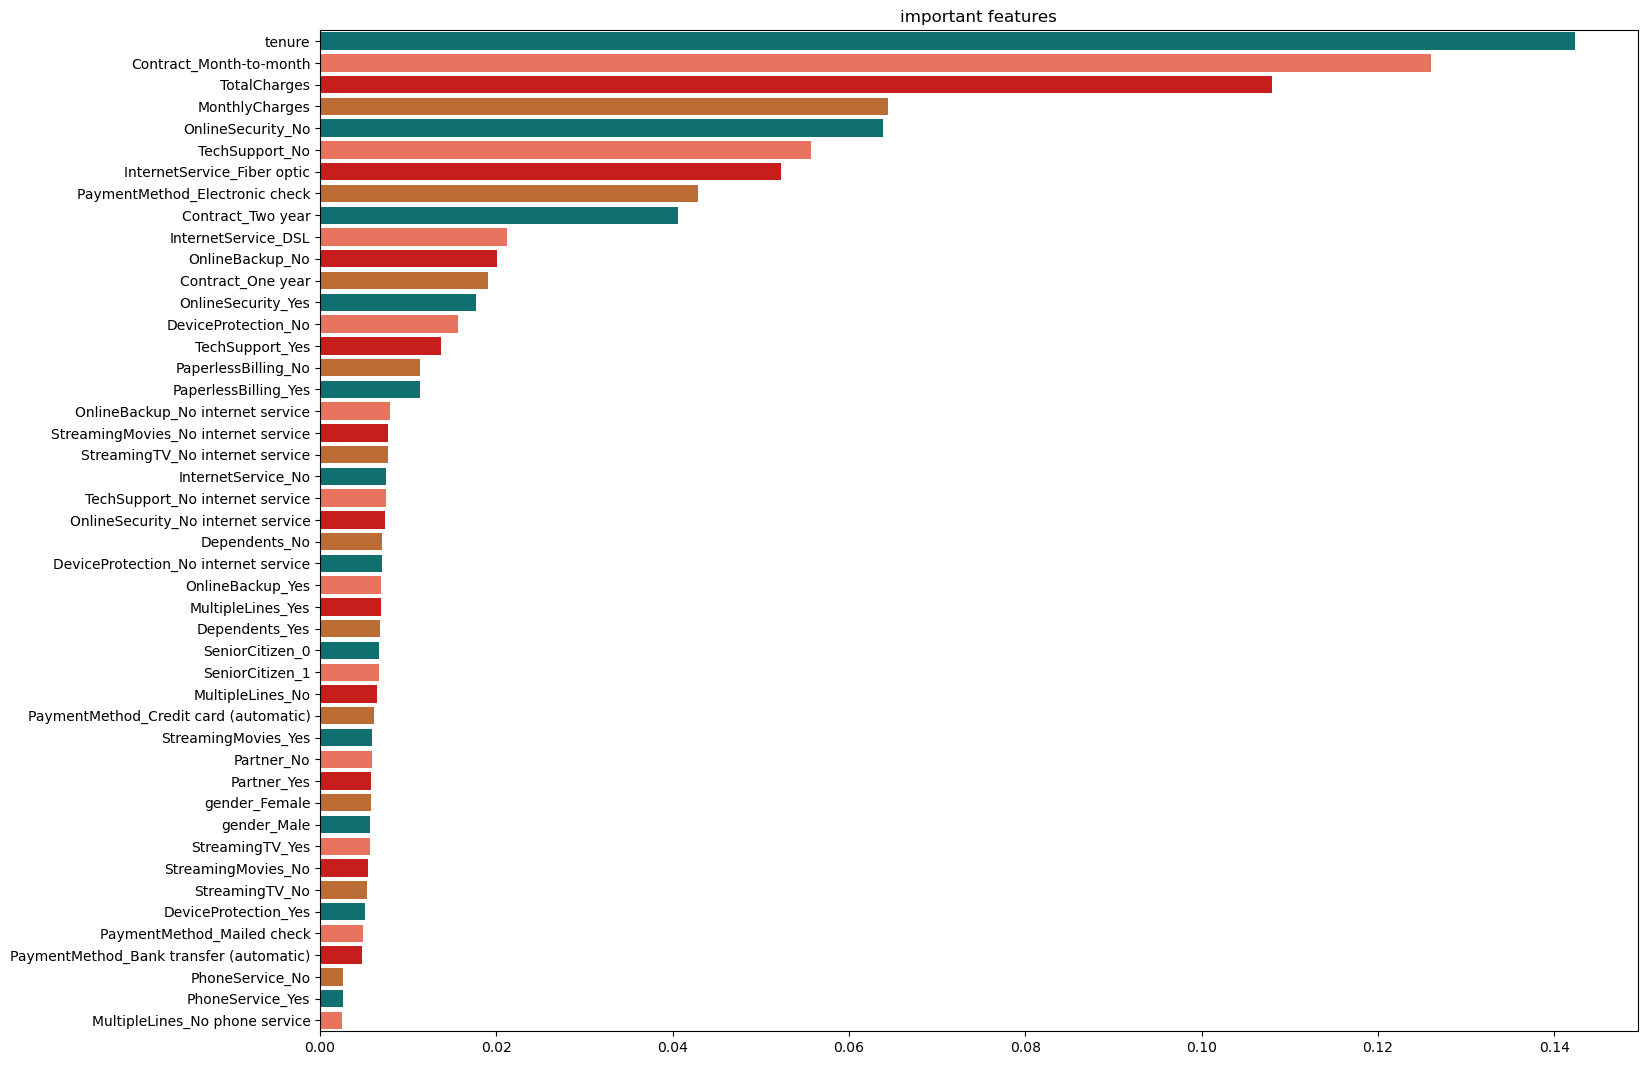

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=5000, max_depth=8, min_samples_leaf=3, min_samples_split=3, random_state=42)
clf = clf.fit(x_train, y_train)

fimp = pd.Series(data =clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("important features")
sns.barplot(x = fimp.values, y= fimp.index, palette=palette, orient='h')